In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai') 
import numpy as np
import pandas as pd
from sklearn import svm

In [6]:
train = pd.read_csv("./train_crown_features.csv")
test = pd.read_csv("./test_crown_features.csv")
print(train.describe())

         train_id      mean_h  crown_area  crown_perim         dbh
count  100.000000  100.000000   100.00000   100.000000  100.000000
mean    50.500000   25.116951    22.13120    25.992000   40.280000
std     29.011492    6.062526    12.88846     9.234451   13.447301
min      1.000000   14.525690     2.08000     1.600000   14.500000
25%     25.750000   20.403993    12.28000    20.800000   29.875000
50%     50.500000   23.497401    20.16000    26.400000   41.000000
75%     75.250000   29.329508    29.48000    32.800000   51.875000
max    100.000000   40.867333    65.44000    45.600000   63.500000


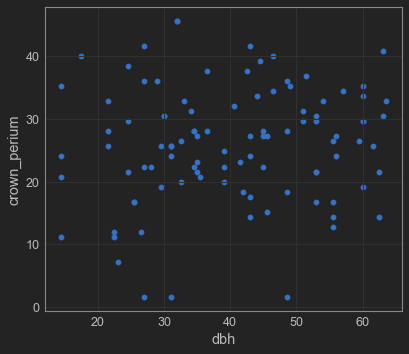

In [7]:
import matplotlib.pyplot as plt
x = train["dbh"]
y = train["crown_perim"]
plt.scatter(x,y)
plt.xlabel("dbh")
plt.ylabel("crown_perium")
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split, GridSearchCV

target = train["dbh"]
train = train.drop(["dbh"],axis=1)

In [51]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

def norm(x):
  return (x - x.mean()) / x.std()
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


model = build_model()
X_index, Y_index = train_test_split(train,test)
X_train = norm(train.loc[X_index])
Y_train = norm(train.loc[Y_index])
X_target, Y_target = norm(target[X_index]), norm(target[Y_index])
X_pred = model.predict(X_train)

ValueError: Found input variables with inconsistent numbers of samples: [100, 25]

In [50]:
results = np.array(results)
print('RMSE train : %.3f, test : %.3f' % (
    np.sqrt(mean_squared_error(X_target,X_pred))))

TypeError: not enough arguments for format string

In [41]:
plt.figure(figsize = (10, 7))
plt.scatter(X_pred, X_pred - X_target, c = 'yellow', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(Y_pred, Y_pred - Y_target, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10, xmax = 70, lw = 2, color = 'red')
plt.show()

Exception: Data must be 1-dimensional

<Figure size 720x504 with 0 Axes>

In [43]:
pred = pd.DataFrame()
pred["Id"] = test["test_id"]
pred["dbh"] = model.predict(test) * 
pred["dbh"] = (pred["dbh"]).round(2)
pred.to_csv("DBH_Keras_LOO.csv", index=False)